MindSpore.dataset provides APIs to load and process datasets such as MNIST, CIFAR-10, CIFAR-100, VOC, ImageNet, and CelebA.

*Step 1 : Load the MNIST dataset*

<function matplotlib.pyplot.show(close=None, block=None)>

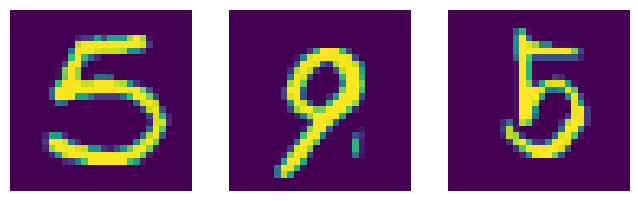

In [3]:
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt

dataset_dir = "../datasets/MNIST/train"   #Path of the dataset

#Read three images from the MNIST dataset
mnist_dataset = ds.MnistDataset(dataset_dir=dataset_dir, num_samples = 3)

#View the images and set the image sizes
plt.figure(figsize = (8,8))
i=1

#Print three subgraphs
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3, 3, i)
    plt.imshow(dic['image'][:, : , 0])
    plt.axis('off')
    i += 1
plt.show

*Step 2 : Customize a dataset*

For datasets that cannot be directly loaded by MindSpore, you can build a custom dataset class and use the GeneratorDataset API to customize the data loading

In [4]:
import numpy as np
np.random.seed(58)

class DatasetGenerator:
    #When a dataset object is instatiated, the __init__ function is called. You can perform operations such as data initialization
    def __init__(self):
        self.data = np.random.sample((5, 2))
        self.label = np.random.sample((5, 1))
    #Define the __getitem__ function of the dataset class to support random access and obtain and return data in the dataset based on the specified index value
    def __getitem__(self, index):
        return self.data[index], self.label[[index]]
    #Define the __len__ function of the dataset class and return the number of samples in the dataset
    def __len__(self):
        return len(self.data)
    #After the dataset class is defined, the GeneratorDataset API can be used to load and access dataset samples in custom mode
    